In [1]:
import mysql.connector
import keyring


In [2]:
db = mysql.connector.connect(
    host="localhost",
    user="stefan",
    passwd="Gigelfrone112!!",
    auth_plugin = 'mysql_native_password',
    database = "declaratiiavere",
)

mycursor = db.cursor()

In [ ]:
mycursor.execute("SHOW tables;")

In [ ]:
for result in mycursor:
    print(result)

In [22]:
mycursor.execute("DROP TABLE TEREN_CLADIRE;")
mycursor.execute("DROP TABLE MIJLOC_TRANSPORT;")
mycursor.execute("DROP TABLE BUN_CULTURAL;")
mycursor.execute("DROP TABLE BUN_INSTRAINAT;")
mycursor.execute("DROP TABLE ACTIVA_FINANCIARA_INDIRECTA;")
mycursor.execute("DROP TABLE ACTIVA_FINANCIARA_DIRECTA;")
mycursor.execute("DROP TABLE ALTA_ACTIVA_FINANCIARA")
mycursor.execute("DROP TABLE AJUTOR;")
mycursor.execute("DROP TABLE MEMBRU_STAT;")
mycursor.execute("DROP TABLE MEMBRU_NON_STAT;")
mycursor.execute("DROP TABLE MEMBRU_PARTID;")
mycursor.execute("DROP TABLE MEMBRU_SINDICAT;")
mycursor.execute("DROP TABLE VENIT;")
mycursor.execute("DROP TABLE CONTRACT;")
mycursor.execute("DROP TABLE DATORIE;")
mycursor.execute("DROP TABLE DOCUMENT;")
mycursor.execute("DROP TABLE TITULAR;")




In [23]:
mycursor.execute("""CREATE TABLE TITULAR(
                titular_id INT PRIMARY KEY,
                nume VARCHAR(50),
                init_tata VARCHAR(8),
                prenume VARCHAR(50),
                functie VARCHAR(80),
                institutie VARCHAR(80),
                avere_personala INT,
                an_ultima_declaratie YEAR
                );""")

mycursor.execute("""CREATE TABLE DOCUMENT(
                doc_id INT PRIMARY KEY,
                titular_id INT,
                data DATE,
                tip_doc INT,
                avere_doc INT,
                FOREIGN KEY (titular_id) REFERENCES TITULAR(titular_id)
                );""")

mycursor.execute("""CREATE TABLE TEREN_CLADIRE(
                teren_id INT PRIMARY KEY AUTO_INCREMENT,
                doc_id INT,
                tip INT,
                tara VARCHAR(40),
                judet VARCHAR(40),
                localitate VARCHAR(40),
                categorie VARCHAR(71),
                an_dobandire YEAR,
                suprafata INT,
                cota_parte VARCHAR(40),
                mod_dobandire VARCHAR(70),
                proprietar VARCHAR (150),
                val_estimata INT,
                FOREIGN KEY (doc_id) REFERENCES DOCUMENT(doc_id)
                );""")

mycursor.execute("""CREATE TABLE MIJLOC_TRANSPORT(
                mijloc_transport_id INT PRIMARY KEY AUTO_INCREMENT,
                doc_id INT,
                natura VARCHAR(50),
                marca VARCHAR(50),
                nr_bucati INT,
                an_fabricatie YEAR,
                mod_dobandire VARCHAR(70),
                val_estimata INT,
                FOREIGN KEY (doc_id) REFERENCES DOCUMENT(doc_id)
                );""")

mycursor.execute("""CREATE TABLE BUN_CULTURAL(
                bun_cultural_id INT PRIMARY KEY AUTO_INCREMENT,
                doc_id INT,
                descriere_sumara VARCHAR(90),
                an_dobandire YEAR,
                valoare_nr INT,
                valoare_valuta VARCHAR(15),
                FOREIGN KEY (doc_id) REFERENCES DOCUMENT(doc_id)
                );""")

mycursor.execute("""CREATE TABLE BUN_INSTRAINAT(
                bun_instrainat_id INT PRIMARY KEY AUTO_INCREMENT,
                doc_id INT,
                natura VARCHAR(50),
                data DATE,
                persoana_catre VARCHAR(70),
                forma VARCHAR(40),
                valoare_nr INT,
                valoare_valuta VARCHAR(10),
                FOREIGN KEY (doc_id) REFERENCES DOCUMENT(doc_id)
                );""")

mycursor.execute("""CREATE TABLE ACTIVA_FINANCIARA_DIRECTA(
                fin_direct_id INT PRIMARY KEY AUTO_INCREMENT,
                doc_id INT,
                emitent VARCHAR(70),
                tip VARCHAR(130),
                nr_sau_cota INT,
                valoare_nr INT,
                valoare_valuta VARCHAR(10),
                FOREIGN KEY (doc_id) REFERENCES DOCUMENT(doc_id)
                );""")

mycursor.execute("""CREATE TABLE ACTIVA_FINANCIARA_INDIRECTA(
                fin_indirect_id INT PRIMARY KEY AUTO_INCREMENT,
                doc_id INT,
                institutie VARCHAR(100),
                tip VARCHAR(130),
                valuta VARCHAR(10),
                an YEAR,
                sold INT,
                FOREIGN KEY (doc_id) REFERENCES DOCUMENT(doc_id)
                );""")

mycursor.execute("""CREATE TABLE ALTA_ACTIVA_FINANCIARA(
                fin_alte_id INT PRIMARY KEY AUTO_INCREMENT,
                doc_id INT,
                descriere VARCHAR(80),
                valoare INT,
                valuta VARCHAR(10),
                FOREIGN KEY (doc_id) REFERENCES DOCUMENT(doc_id)
                );""")


mycursor.execute("""CREATE TABLE DATORIE(
                datorie_id INT PRIMARY KEY AUTO_INCREMENT,
                doc_id INT,
                creditor VARCHAR(70),
                an_creata YEAR,
                an_scadenta YEAR,
                valoare_nr INT,
                valoare_valuta VARCHAR(10),
                FOREIGN KEY (doc_id) REFERENCES DOCUMENT(doc_id)
                );""")

mycursor.execute("""CREATE TABLE AJUTOR(
                ajutor_id INT PRIMARY KEY AUTO_INCREMENT,
                doc_id INT,
                realizator_tip INT,
                realizator_nume VARCHAR(2570),
                sursa VARCHAR(120),
                serviciu_obiect VARCHAR(60),
                venit_nr INT,
                venit_valuta VARCHAR(10),
                FOREIGN KEY (doc_id) REFERENCES DOCUMENT(doc_id)
                );""")

mycursor.execute("""CREATE TABLE VENIT(
                venit_id INT PRIMARY KEY AUTO_INCREMENT,
                doc_id INT,
                venit_tip VARCHAR(100),
                realizator_tip INT,
                realizator_nume VARCHAR(80),
                sursa VARCHAR(150),
                serviciu_obiect VARCHAR(130),
                venit_nr INT,
                venit_valuta VARCHAR(10),
                FOREIGN KEY (doc_id) REFERENCES DOCUMENT(doc_id)
                );""")


mycursor.execute("""CREATE TABLE MEMBRU_NON_STAT(
                membru_non_stat_id INT PRIMARY KEY AUTO_INCREMENT,
                doc_id INT,
                unitate VARCHAR(120),
                calitate VARCHAR(40),
                nr_parti_sociale INT,
                valoare_nr INT,
                valoare_valuta VARCHAR(10),
                FOREIGN KEY (doc_id) REFERENCES DOCUMENT(doc_id)
                );""")

mycursor.execute("""CREATE TABLE MEMBRU_STAT(
                membru_stat_id INT PRIMARY KEY AUTO_INCREMENT,
                doc_id INT,
                unitate VARCHAR(120),
                calitate VARCHAR(40),
                valoare_nr INT,
                valoare_valuta VARCHAR(10),
                FOREIGN KEY (doc_id) REFERENCES DOCUMENT(doc_id)
                );""")

mycursor.execute("""CREATE TABLE MEMBRU_SINDICAT(
                membru_sindicat_id INT PRIMARY KEY AUTO_INCREMENT,
                doc_id INT,
                functie VARCHAR(100),
                FOREIGN KEY (doc_id) REFERENCES DOCUMENT(doc_id)
                );""")

mycursor.execute("""CREATE TABLE MEMBRU_PARTID(
                membru_partid_id INT PRIMARY KEY AUTO_INCREMENT,
                doc_id INT,
                functie VARCHAR(100),
                FOREIGN KEY (doc_id) REFERENCES DOCUMENT(doc_id)
                );""")

mycursor.execute("""CREATE TABLE CONTRACT(
                contract_id INT PRIMARY KEY AUTO_INCREMENT,
                doc_id INT,
                tip_beneficiar INT,
                nume_beneficiar VARCHAR(60),
                institutie_contractanta VARCHAR(100),
                procedura VARCHAR(50),
                tip_contract VARCHAR(40),
                data_incheiere YEAR,
                durata VARCHAR(30),
                valoare_nr INT,
                valoare_valuta VARCHAR(10),
                FOREIGN KEY (doc_id) REFERENCES DOCUMENT(doc_id)
                );""")


In [77]:
mycursor = db.cursor()

In [3]:
mycursor.execute("""SELECT * from TITULAR;""")
for result in mycursor:
    print(result)

(1, 'Ciolacu', 'I.', 'Ion-Marcel', 'Președintele Camerei Deputaților', 'Camera Deputatilor', 147612, 2023)
(3, 'LUPU', 'M.', 'MIOARA', 'Grefier', 'Tribunalul Iasi', -1, 1901)
(4, 'IONESCU', 'N.', 'EUGENIA', 'Inspector Vamal', 'Autoritatea Vamala Romana', 210745, 2022)
(8, 'IOHANNIS', 'G.H.', 'KLAUS WERNER', 'Președintele României', 'Administratia Prezidentiala', 1331680, 2023)
(9, 'COSTACHE', 'A.', 'SIMONA-MARIA', 'Consilier', 'Agentia Nationala Pentru Achizitii Publice', -1, 1901)
(13, 'Vîrlan', 'M.', 'Tudor Marius', 'Membru Proiect', 'Oficiul De Cadastru Si Publicitate Imobiliara', 584471, 2022)
(14, 'Floare', 'D.', 'Adina', 'Agent debutant', 'Inspectoratul De Politie Al Judetului Mures', -1, 1901)
(15, 'Alexandru', 'D.', 'Victoria-Violeta', 'Deputat', 'Camera Deputatilor', -1, 1901)
(22, 'IONESCU', 'I.', 'RADU TUDOR', 'Director proiect', 'Universitatea Din Bucuresti', -1, 1901)
(23, 'Făgădar', 'V.', 'Mihaela-Elena', 'Inspector', 'Serviciul Public Comunitar Local De Evidenta A Persoa

In [10]:
mycursor.execute("""SELECT * from DOCUMENT;""")
for result in mycursor:
    print(result)

(1, 1, datetime.date(2023, 6, 13), 1, 147612)
(2, 1, datetime.date(2023, 6, 27), 2, 0)
(3, 1, datetime.date(2022, 5, 26), 2, 0)
(4, 4, datetime.date(2023, 5, 31), 2, 0)
(5, 4, datetime.date(2022, 6, 9), 2, 0)
(6, 4, datetime.date(2022, 6, 9), 1, 1318504)
(7, 4, datetime.date(2023, 5, 31), 1, 1331680)


In [11]:
mycursor.execute("""SELECT * from TEREN_CLADIRE;""")
for result in mycursor:
    print(result)


(1, 1, 0, 'ROMANIA', 'Buzau', 'Buzau', 'Intravilan', 2002, 387, '1/1', 'Contract de vânzare cumpărare', 'CIOLACU ION MARCEL CIOLACU ROXANA MIHAELA', 10344)
(2, 1, 0, 'ROMANIA', 'Buzau', 'Buzau', 'Intravilan', 1999, 79, '1/1', 'Contract de vânzare cumpărare', 'CIOLACU ION MARCEL CIOLACU ROXANA MIHAELA', 2111)
(3, 1, 1, 'ROMANIA', 'Buzau', 'Buzau', 'Casă de locuit', 2005, 51, '1/1', 'Construcție', 'CIOLACU ION MARCEL CIOLACU ROXANA MIHAELA', 73440)
(4, 1, 1, 'ROMANIA', 'Buzau', 'Buzau', 'Casă de locuit', 1999, 4, '1/1', 'Contract de vânzare cumpărare', 'CIOLACU ION MARCEL CIOLACU ROXANA MIHAELA', 5760)
(5, 6, 1, 'ROMANIA', 'Sibiu', 'Sibiu', 'Apartament', 1997, 60, '1/1', 'Contract de vânzare cumpărare', 'IOHANNIS KLAUS IOHANNIS CARMEN', 85920)
(6, 6, 1, 'ROMANIA', 'Sibiu', 'Sibiu', 'Apartament', 2001, 253, '1/1', 'Contract de vânzare cumpărare', 'IOHANNIS KLAUS IOHANNIS CARMEN', 362296)
(7, 6, 1, 'ROMANIA', 'Sibiu', 'Sibiu', 'Casă de locuit', 1992, 377, '1/1', 'Contract de donaţie Contra

In [63]:
mycursor.execute("""SELECT * from MIJLOC_TRANSPORT;""")
for result in mycursor:
    print(result)

In [64]:
mycursor.execute("""SELECT * from BUN_CULTURAL;""")
for result in mycursor:
    print(result)

In [65]:
mycursor.execute("""SELECT * from BUN_INSTRAINAT;""")
for result in mycursor:
    print(result)

In [66]:
mycursor.execute("""SELECT * from ACTIVA_FINANCIARA_INDIRECTA;""")
for result in mycursor:
    print(result)

(1, 1, 'BANCA COMERCIALĂ ROMÂNĂ, *************', 'Cont curent sau echivalente (inclusiv card)', 'RON', 1999, 170000)
(2, 2, 'BANCA COMERCIALĂ ROMÂNĂ, *************', 'Cont curent sau echivalente (inclusiv card)', 'RON', 1999, 200000)
(3, 4, 'BANCA TRANSILVANIA, ***************', 'Cont curent sau echivalente (inclusiv card)', 'RON', 2003, 38162)
(4, 4, 'BANCA TRANSILVANIA, ***************', 'Cont curent sau echivalente (inclusiv card)', 'RON', 2017, 2058)
(5, 4, 'BANCA TRANSILVANIA, ***************', 'Cont curent sau echivalente (inclusiv card)', 'EUR', 2019, 3093)
(6, 4, 'BANCA TRANSILVANIA, ***************', 'Depozit bancar sau echivalente', 'EUR', 2022, 10000)
(7, 4, 'BANCA TRANSILVANIA, ***************', 'Depozit bancar sau echivalente', 'EUR', 2023, 10029)
(8, 4, 'BANCA TRANSILVANIA, ***************', 'Depozit bancar sau echivalente', 'EUR', 2023, 10029)
(9, 4, 'BANCA TRANSILVANIA, ***************', 'Cont curent sau echivalente (inclusiv card)', 'RON', 2015, 11935)
(10, 4, 'BANCA T

In [67]:
mycursor.execute("""SELECT * from ACTIVA_FINANCIARA_DIRECTA;""")
for result in mycursor:
    print(result)

In [ ]:
mycursor.execute("""SELECT * from ALTA_ACTIVA_FINANCIARA;""")
for result in mycursor:
    print(result)

In [ ]:
mycursor.execute("""SELECT * from DATORIE;""")
for result in mycursor:
    print(result)

In [ ]:
mycursor.execute("""SELECT * from AJUTOR;""")
for result in mycursor:
    print(result)

In [ ]:
mycursor.execute("""SELECT * from VENIT;""")
for result in mycursor:
    print(result)

In [6]:
mycursor.execute("""SELECT * from MEMBRU_STAT;""")
for result in mycursor:
    print(result)

(1, 2, '1.1 ASOCIATIA LUMINA 1879 - Buzau ****************************', 'Membru fondator', 0, 'RON')


In [7]:
mycursor.execute("""SELECT * from MEMBRU_NON_STAT;""")
for result in mycursor:
    print(result)

(1, 2, '1.1 ALCOM SRL - Buzau ****************************** *', 'Asociat', 3010, 3010, 'RON')
(2, 4, '1.1 SecurifAI SRL - Prahova ********************* **', 'Acţionar', 3120, 3120, 'RON')


In [8]:
mycursor.execute("""SELECT * from MEMBRU_PARTID;""")
for result in mycursor:
    print(result)

(1, 2, '4.1 Partidul Social Democrat - Presedinte')
(2, 2, '4.2 Partidul Social Democrat - Membru al Consiliului Politic National')
(3, 2, '4.3 Partidul Social Democrat - Membru al Biroului Permanent National')


In [9]:
mycursor.execute("""SELECT * from MEMBRU_SINDICAT;""")
for result in mycursor:
    print(result)

(1, 3, '3.1 IPA Mureș - Membru')
(2, 3, '3.2 CNP Mureș - Membru')
(3, 4, '3.1 Ad Astra - Membru')


In [ ]:
mycursor.execute("""SELECT * from CONTRACT;""")
for result in mycursor:
    print(result)

In [ ]:
mycursor.execute("""select * from teren_cladire 
            where doc_id = '3';""")
for result in mycursor:
    print(result)

In [18]:
mycursor.execute("""select * from TEREN_CLADIRE tc
                join document d
                on tc.doc_id = d.doc_id
                where d.titular_id = 1 order by d.data asc;""")
for result in mycursor:
    print(result)

(5, 2, 0, 'ROMANIA', 'Buzau', 'Buzau', 'Intravilan', 2002, 387, '1/1', 'Contract de vânzare cumpărare', 'CIOLACU ROXANA MIHAELA CIOLACU ION MARCEL', 10344, 2, 1, datetime.date(2022, 5, 26), 1, 151520)
(6, 2, 0, 'ROMANIA', 'Buzau', 'Buzau', 'Intravilan', 1999, 79, '1/1', 'Contract de vânzare cumpărare', 'CIOLACU ROXANA MIHAELA CIOLACU ION MARCEL', 2111, 2, 1, datetime.date(2022, 5, 26), 1, 151520)
(7, 2, 1, 'ROMANIA', 'Buzau', 'Buzau', 'Casă de locuit', 2005, 51, '1/1', 'Construcție', 'CIOLACU ROXANA MIHAELA CIOLACU ION MARCEL', 73032, 2, 1, datetime.date(2022, 5, 26), 1, 151520)
(8, 2, 1, 'ROMANIA', 'Buzau', 'Buzau', 'Casă de locuit', 1999, 4, '1/1', 'Contract de vânzare cumpărare', 'CIOLACU ROXANA MIHAELA CIOLACU ION MARCEL', 5728, 2, 1, datetime.date(2022, 5, 26), 1, 151520)
(1, 1, 0, 'ROMANIA', 'Buzau', 'Buzau', 'Intravilan', 2002, 387, '1/1', 'Contract de vânzare cumpărare', 'CIOLACU ION MARCEL CIOLACU ROXANA MIHAELA', 10344, 1, 1, datetime.date(2023, 6, 13), 1, 147612)
(2, 1, 0, '

In [19]:
mycursor.execute("""select * from MIJLOC_TRANSPORT mt
            join document d
            on mt.doc_id = d.doc_id
            where d.titular_id = '1' order by d.data asc;""")
for result in mycursor:
    print(result)


In [15]:
for result in mycursor:
    print(result)

(5, 2, 0, 'ROMANIA', 'Buzau', 'Buzau', 'Intravilan', 2002, 387, '1/1', 'Contract de vânzare cumpărare', 'CIOLACU ROXANA MIHAELA CIOLACU ION MARCEL', 10344, 2, 1, datetime.date(2022, 5, 26), 1, 151520)
(6, 2, 0, 'ROMANIA', 'Buzau', 'Buzau', 'Intravilan', 1999, 79, '1/1', 'Contract de vânzare cumpărare', 'CIOLACU ROXANA MIHAELA CIOLACU ION MARCEL', 2111, 2, 1, datetime.date(2022, 5, 26), 1, 151520)
(7, 2, 1, 'ROMANIA', 'Buzau', 'Buzau', 'Casă de locuit', 2005, 51, '1/1', 'Construcție', 'CIOLACU ROXANA MIHAELA CIOLACU ION MARCEL', 73032, 2, 1, datetime.date(2022, 5, 26), 1, 151520)
(8, 2, 1, 'ROMANIA', 'Buzau', 'Buzau', 'Casă de locuit', 1999, 4, '1/1', 'Contract de vânzare cumpărare', 'CIOLACU ROXANA MIHAELA CIOLACU ION MARCEL', 5728, 2, 1, datetime.date(2022, 5, 26), 1, 151520)
(1, 1, 0, 'ROMANIA', 'Buzau', 'Buzau', 'Intravilan', 2002, 387, '1/1', 'Contract de vânzare cumpărare', 'CIOLACU ION MARCEL CIOLACU ROXANA MIHAELA', 10344, 1, 1, datetime.date(2023, 6, 13), 1, 147612)
(2, 1, 0, '

In [24]:
testt = [5] * 10
testt[1] = 7
print(testt)

[5, 7, 5, 5, 5, 5, 5, 5, 5, 5]


Text(0.5, 1.0, 'Avere_personala')

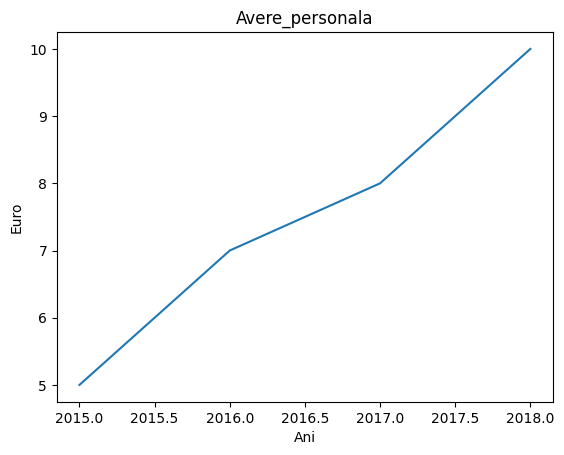

In [25]:
import matplotlib.pyplot as plt

dictproba = {2015: 5, 2016: 7, 2017: 8, 2018: 10}

lists = sorted(dictproba.items()) 

x, y = zip(*lists)

fig = plt.figure()
plt.plot(x, y)
plt.xlabel('Ani')
plt.ylabel('Euro')
plt.title('Avere_personala')